## Unit - 04 - Morphological Operators
## Coin Detection - Class Task 

**Name: Piritharaman R**    
**Reg. No: 212223230148**                                                   


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [4]:
image = cv2.imread('CoinsA.png')  

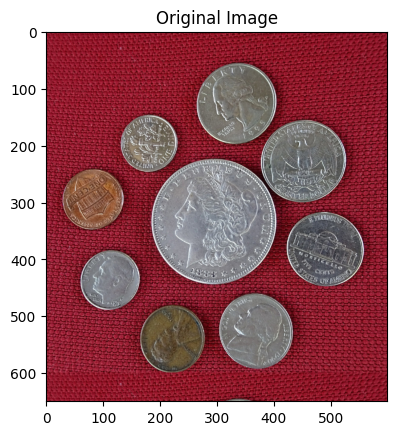

In [5]:
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.show()

# Convert Image to Grayscale¶

In [6]:
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

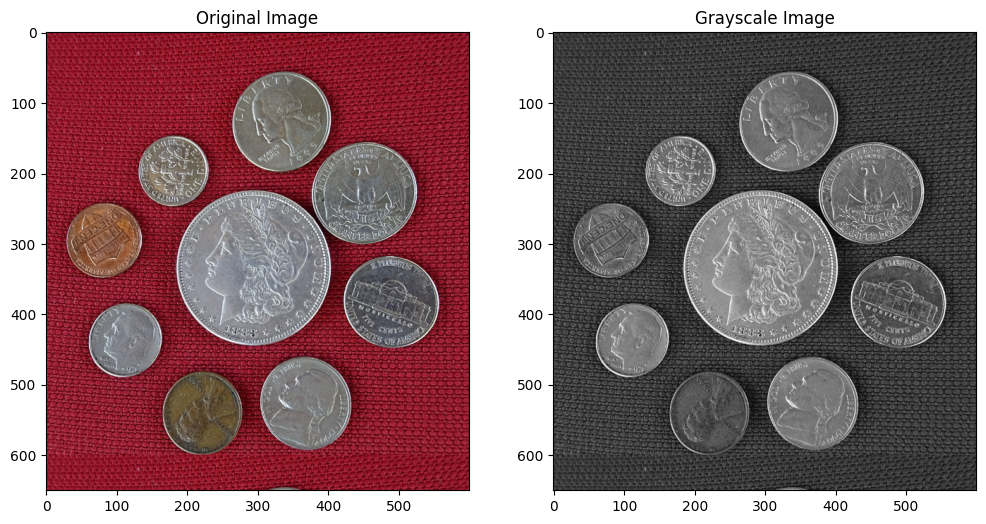

In [7]:
plt.figure(figsize=(12,12))
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(122); plt.imshow(imageGray,cmap='gray');plt.title("Grayscale Image"); plt.show()

# Split Image into R,G,B Channels

In [8]:
imageB, imageG, imageR = cv2.split(image)

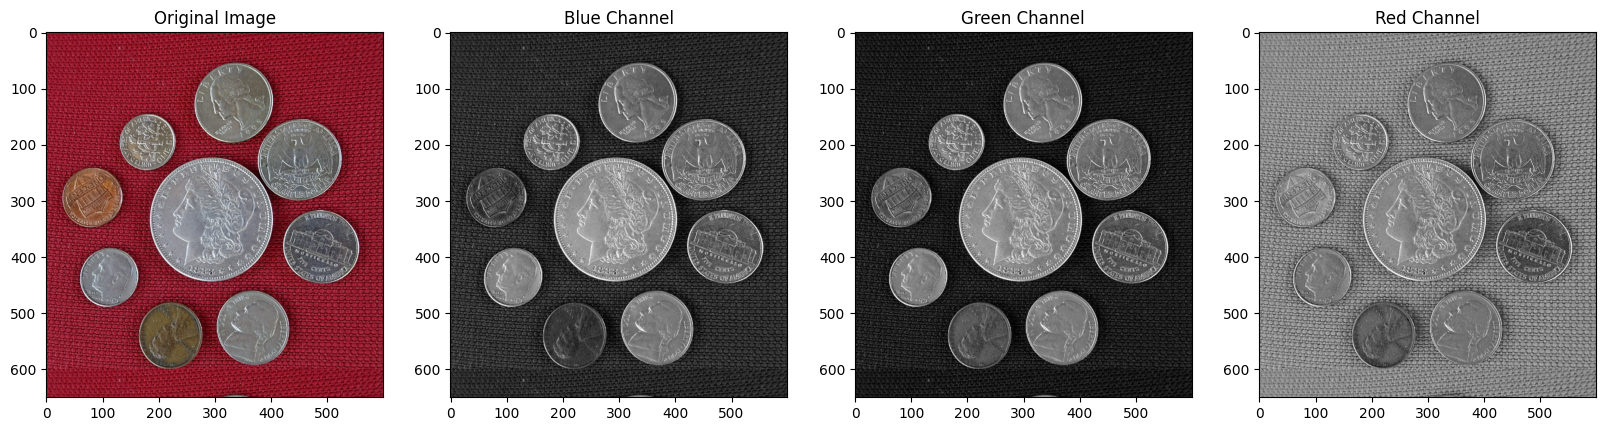

In [9]:
plt.figure(figsize=(20,12))
plt.subplot(141);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(142);plt.imshow(imageB,cmap='gray');plt.title("Blue Channel")
plt.subplot(143);plt.imshow(imageG,cmap='gray');plt.title("Green Channel")
plt.subplot(144);plt.imshow(imageR,cmap='gray');plt.title("Red Channel");
plt.show()

# Perform Thresholding

In [10]:
_, imageThresholded = cv2.threshold(imageGray, 80, 255, cv2.THRESH_BINARY)

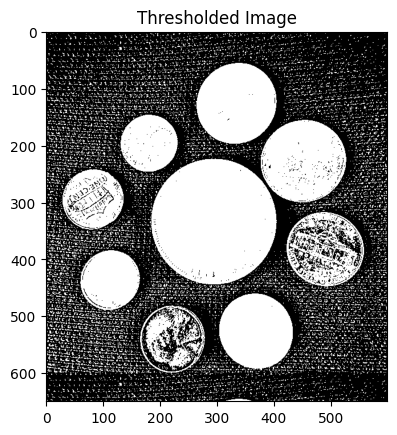

In [11]:
plt.imshow(imageThresholded, cmap='gray');plt.title('Thresholded Image');plt.show()

# Perform morphological operations

In [12]:
kernel = np.ones((3, 3), np.uint8)
imageDilated = cv2.dilate(imageThresholded, kernel, iterations=1)

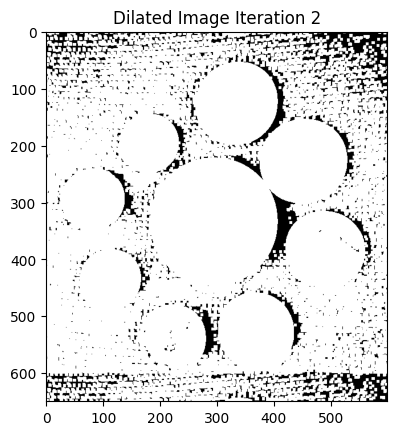

In [13]:
imageDilated2 = cv2.dilate(imageThresholded, kernel, iterations=2)

plt.imshow(imageDilated2,cmap='gray');plt.title('Dilated Image Iteration 2');plt.show()

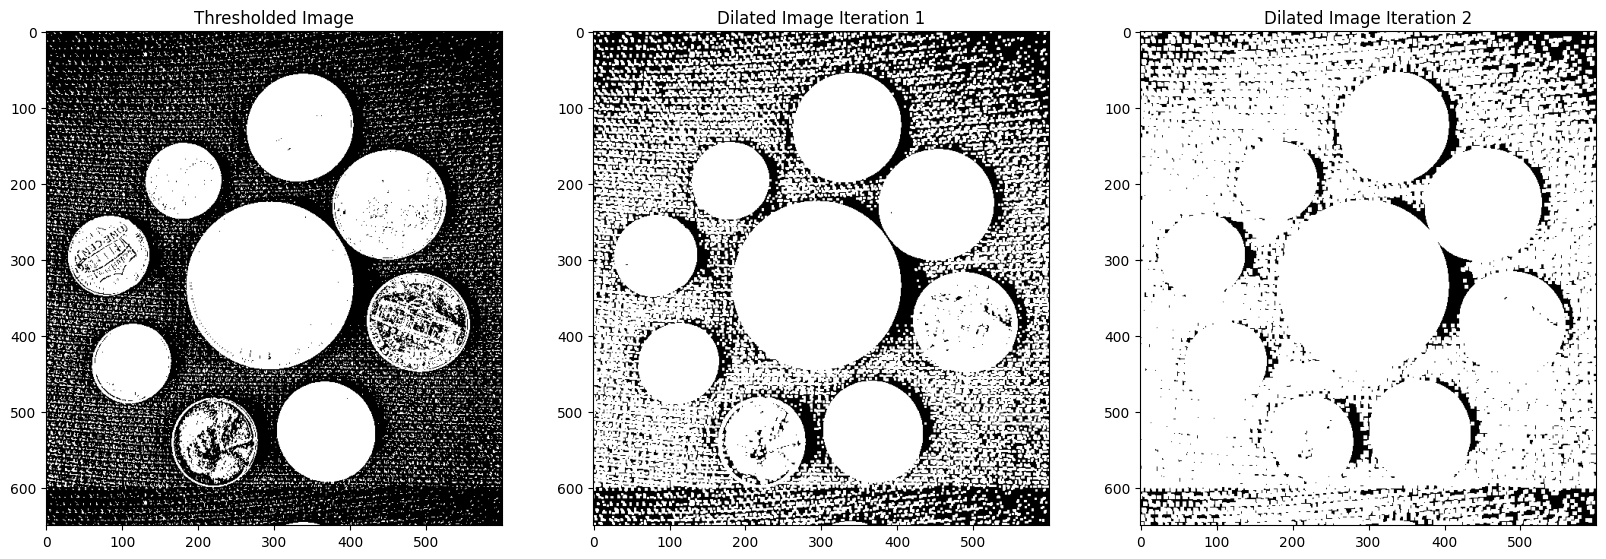

In [14]:
plt.figure(figsize=(20,12))
plt.subplot(131);plt.imshow(imageThresholded,cmap='gray');plt.title("Thresholded Image")
plt.subplot(132);plt.imshow(imageDilated,cmap='gray');plt.title("Dilated Image Iteration 1")
plt.subplot(133);plt.imshow(imageDilated2,cmap='gray');plt.title("Dilated Image Iteration 2")
plt.show()

In [15]:
kernel = np.ones((5, 5), np.uint8)

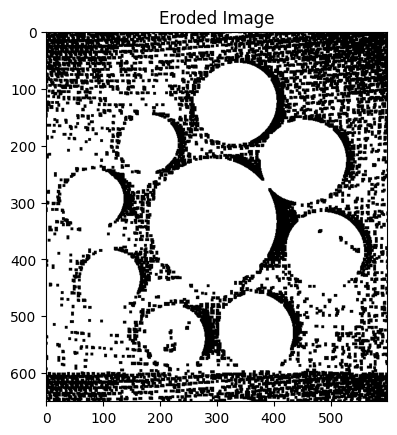

In [16]:
imageEroded = cv2.erode(imageDilated2, kernel, iterations=1)
plt.imshow(imageEroded,cmap='gray');plt.title("Eroded Image");plt.show()

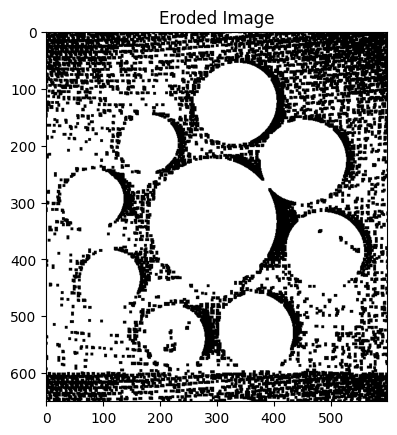

In [17]:
plt.imshow(imageEroded, cmap='gray');plt.title("Eroded Image");plt.show()

#  Create SimpleBlobDetector

In [18]:
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

params.filterByArea = False

params.filterByCircularity = True
params.minCircularity = 0.8

params.filterByConvexity = True
params.minConvexity = 0.8

params.filterByInertia =True
params.minInertiaRatio = 0.8

In [19]:
detector = cv2.SimpleBlobDetector_create(params)

# Detect Coins

In [20]:
keypoints = detector.detect(imageEroded)

In [21]:
print(f"Number of coins detected: {len(keypoints)}")

Number of coins detected: 134
